import libraries

In [2369]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import folium

In [2370]:
# read csv file and save into dataframe df
df = pd.read_csv("Airbnb Listings Bangkok.csv")
# df.head()

In [2371]:
# basic dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

Cleaning missing values

In [2372]:
# dropping redundant unnamed column
df = df.drop(columns=["Unnamed: 0"])
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [2373]:
# find duplicates and handle accordingly
df.duplicated().sum()
# no duplicates

np.int64(0)

In [2374]:
# find missing values and handle accordingly
df.isnull().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [2375]:
# check name column missing values
# df[df["name"].isna()]

In [2376]:
# since name are descrptive titles, replace them with placeholder value of "Unknown"
# df["name"].fillna("Unknown", inplace=True)
df.fillna({"name": "Unknown"}, inplace=True)

In [2377]:
# double check name column missing values
# df[df["name"].isna()]
# no more name column missing values

In [2378]:
# check host_name column missing values
# df[df["host_name"].isna()]

In [2379]:
# since host_name is not too important in the analysis, replace them with placeholder value of "Unknown"
df.fillna({"host_name": "Unknown"}, inplace=True)

In [2380]:
# double check host_name column missing values
# df[df["host_name"].isna()]
# no more host_name column missing values

In [2381]:
# check last_review and reviews_per_month column
# df[df["last_review"].isna() & df["reviews_per_month"].isna()]
# 5790 missing values --> equal

In [2382]:
# len(df[df["number_of_reviews"] == 0])

In [2383]:
# last_review column has 5790 missing values
# reviews_per_month column has 5790 missing values
# above shows 5790 missing values --> btoh last_review and reviews_per_month column falls under the same rows
# last_review can be replaced with placeholder value of "No review" --> since last_review is an object format
# reviews_per_month can be replaced with 0 (no last_review means no reviews were made in any month)

df.fillna({"last_review": "No Review"}, inplace=True)
df.fillna({"reviews_per_month": 0}, inplace=True)

In [2384]:
# double check last_review and reviews_per_month column
# df[df["last_review"].isna() & df["reviews_per_month"].isna()]
# no more missing values

In [2385]:
# double check all columns for missing values
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

Dataset information after cleaning values

In [2386]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.516178,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,0.952753,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.000000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.090000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,0.670000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


# Main Topic
Analysing which type of accomodation would be the most fitting for each region based on price, availability, and number of reviews.

In [2387]:
# number of different neighbourhood
df["neighbourhood"].nunique()

50

In [2388]:
# number of different room_type
df["room_type"].nunique()

4

- want to check the difference in prices between the different types of rooms in different neighbourhoods
- logically, the different types of rooms would have different pricings

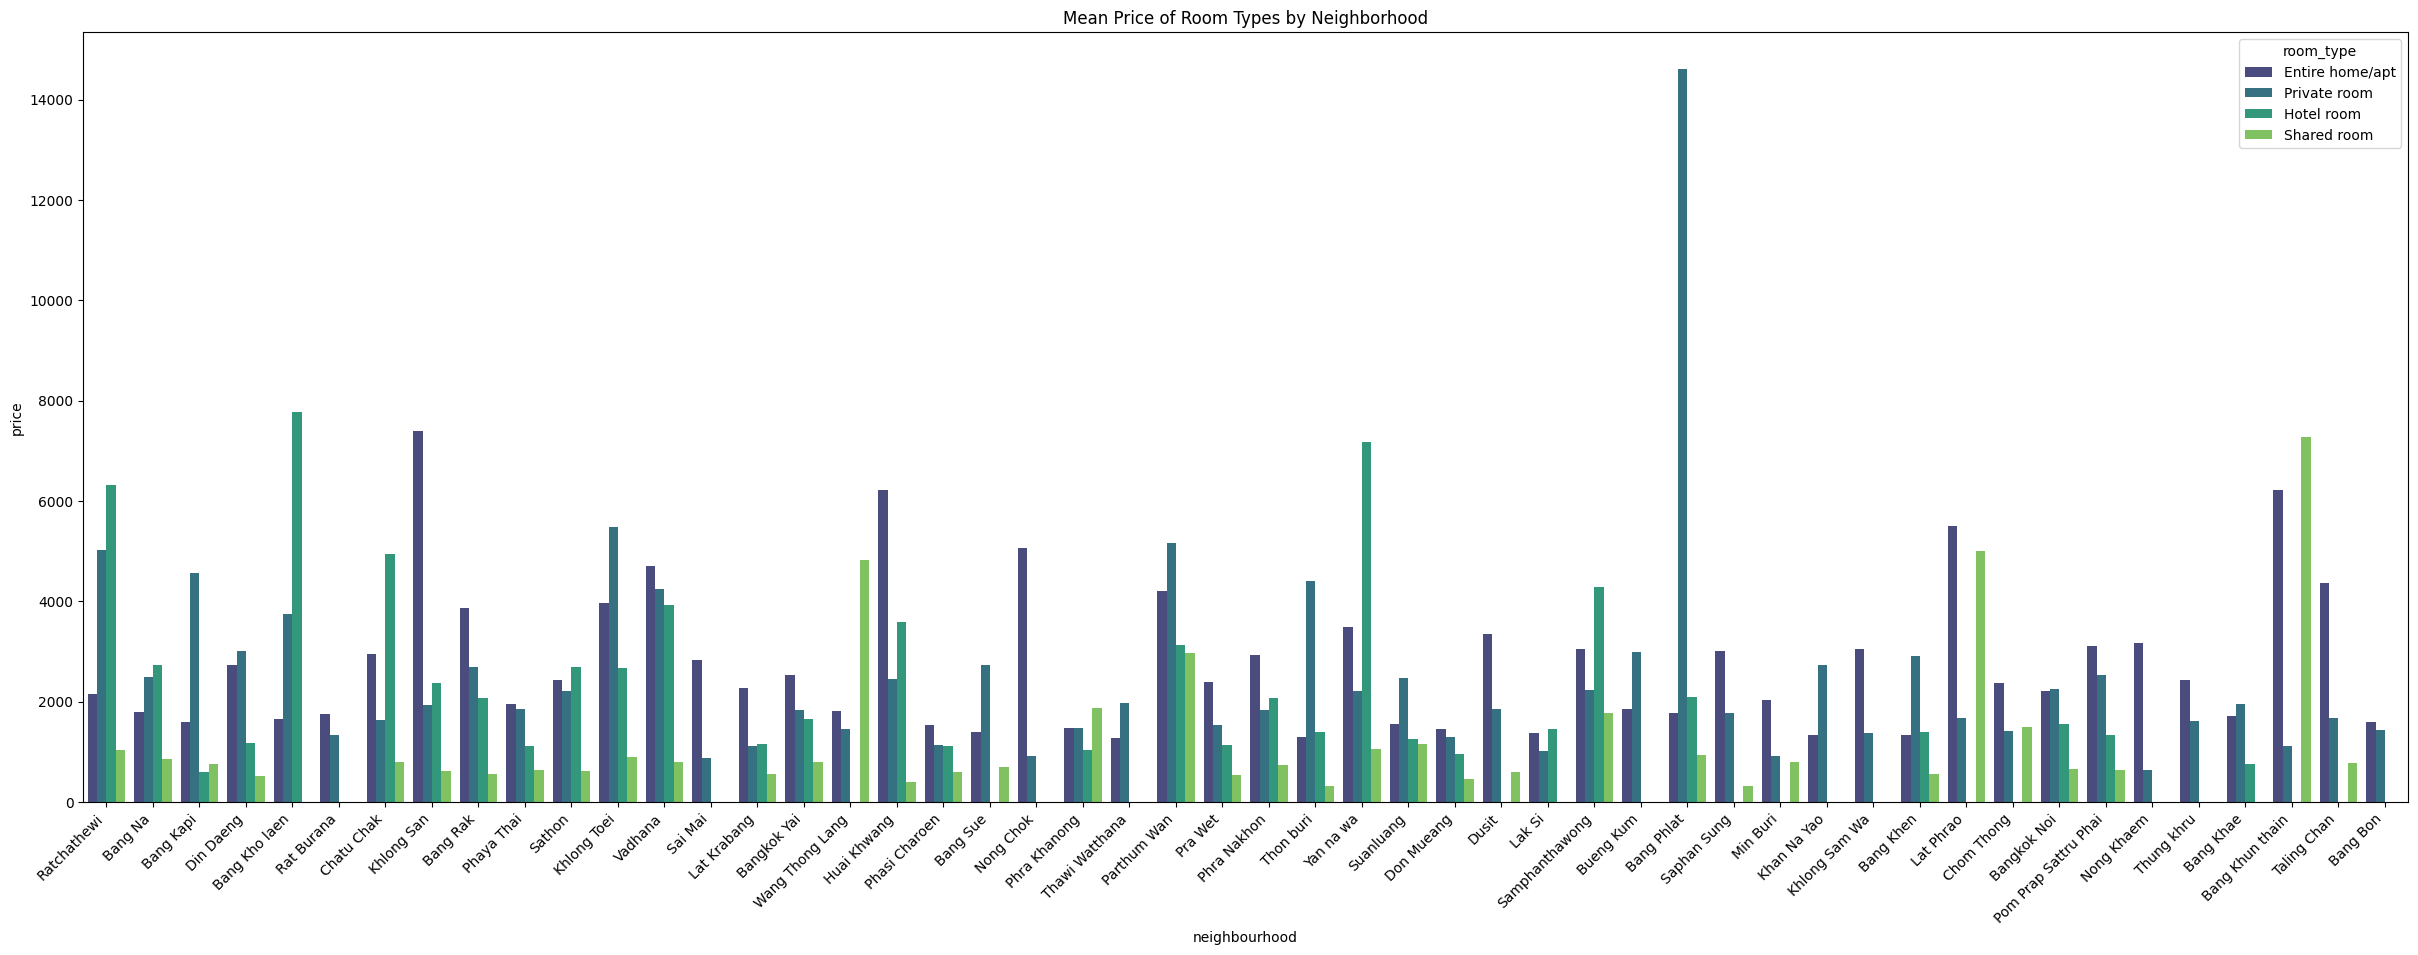

In [2389]:
# create graph to see the mean prices of each room_type in each neighbourhood
plt.figure(figsize=(30, 10))
sns.barplot(x = "neighbourhood", y = "price", data = df, hue = "room_type", estimator=np.mean, errorbar= None, palette="viridis")
plt.title("Mean Price of Room Types by Neighborhood")
plt.xticks(rotation=45, ha="right");

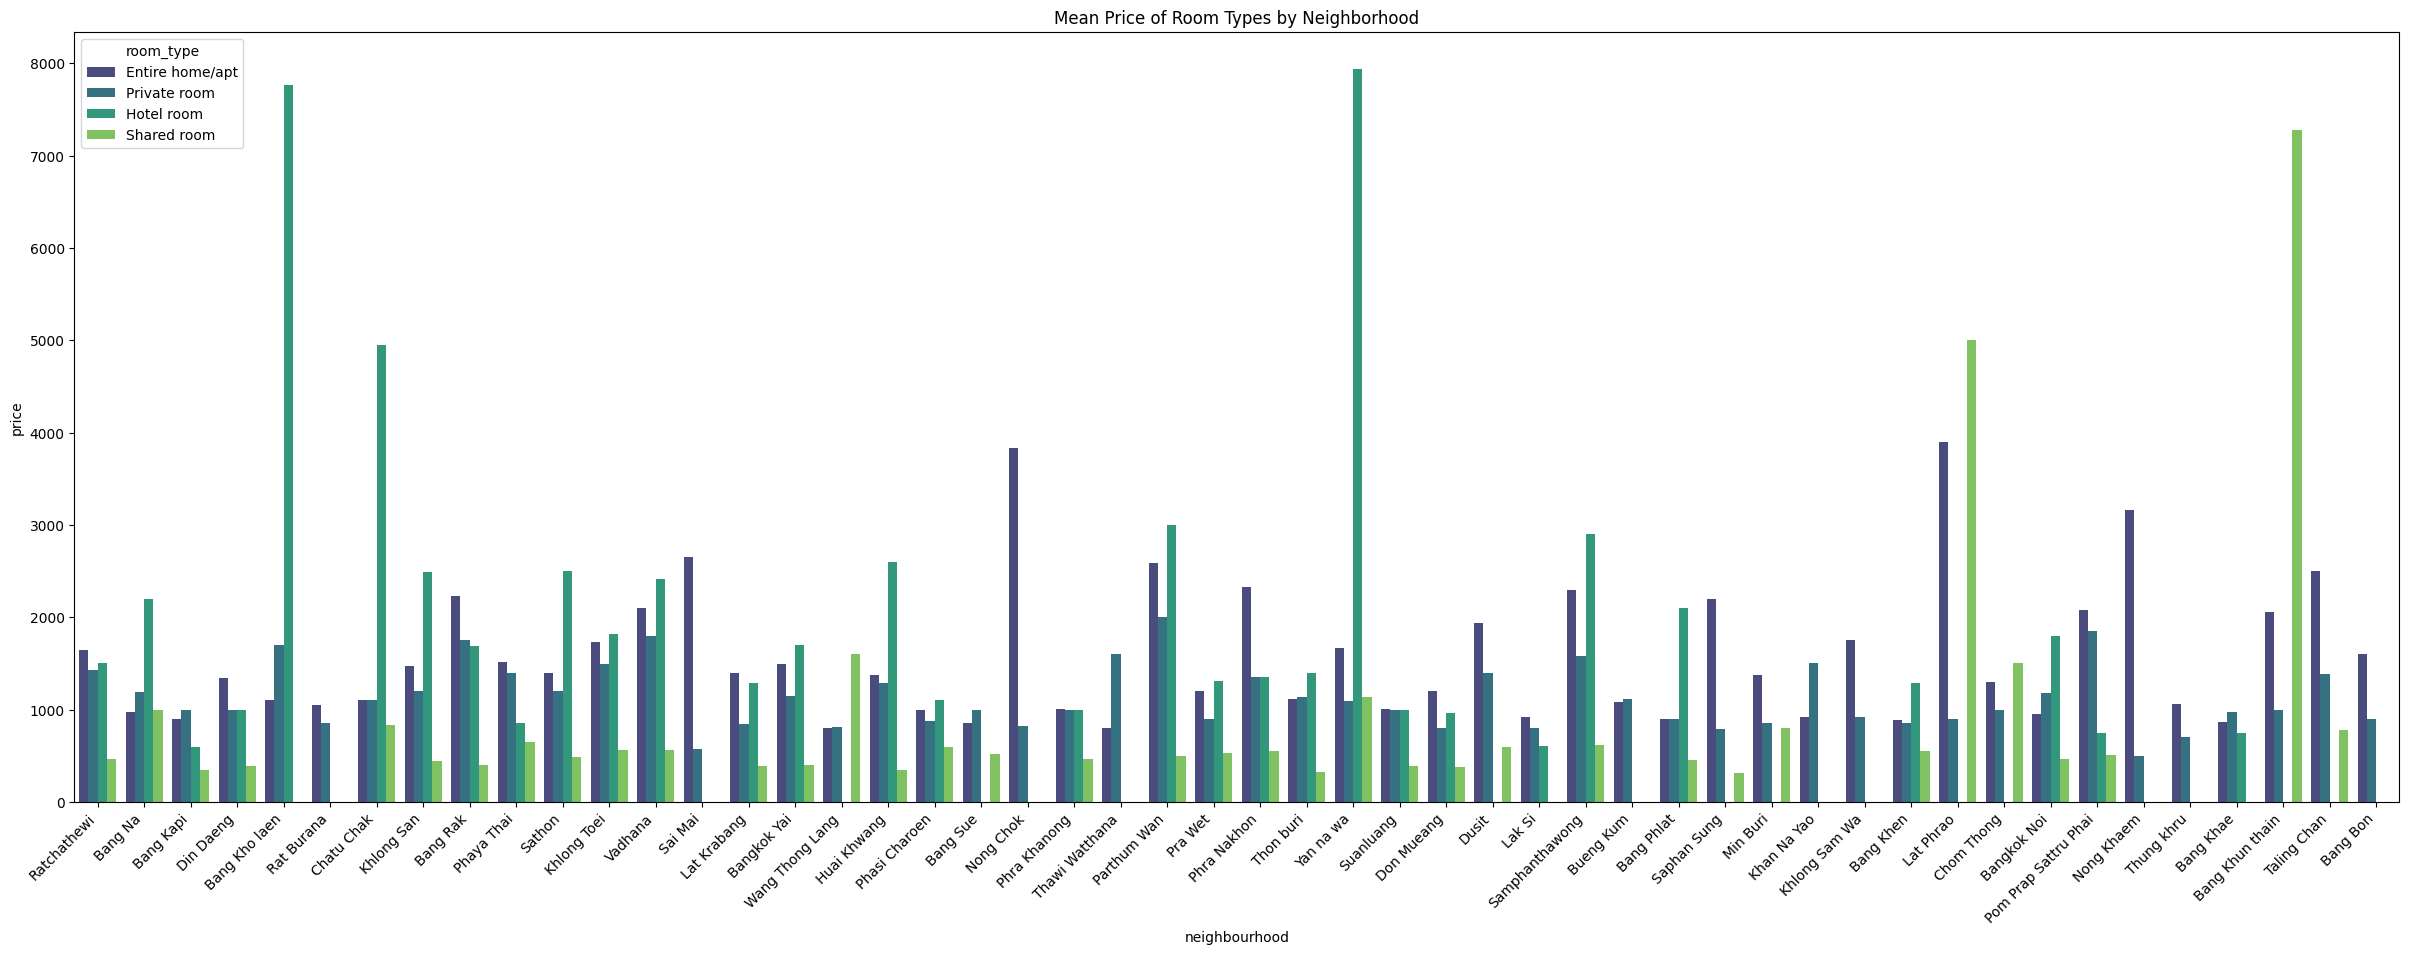

In [2390]:
# create graph to see the median prices of each room_type in each neighbourhood
plt.figure(figsize=(30, 10))
sns.barplot(x = "neighbourhood", y = "price", data = df, hue = "room_type", estimator=np.median, errorbar= None, palette="viridis")
plt.title("Mean Price of Room Types by Neighborhood")
plt.xticks(rotation=45, ha="right");

- too many neighbourhoods --> difficult to visualise
- separate into different zones based on neighbourhood median longitude & latitude
- central, northeast, northwest, southeast, southwest

In [2391]:
neighborhood_medians = df.groupby("neighbourhood")[["latitude", "longitude"]].median().reset_index()
# neighborhood_medians

In [2392]:
# find the median of latitude and longitude separately
median_lat = df["latitude"].median()   
median_lon = df["longitude"].median()  

# create function to assign regions based on lat lon
def assign_region(lat, lon):

    lat_q1, lat_q3 = df["latitude"].quantile([0.25, 0.75])
    lon_q1, lon_q3 = df["longitude"].quantile([0.25, 0.75])
    iqr_lat = lat_q3 - lat_q1
    iqr_lon = lon_q3 - lon_q1
    
    # Adjust Central Region
    central_lat_min = lat_q1
    central_lat_max = lat_q3
    central_lon_min = lon_q1
    central_lon_max = lon_q3
    
    if central_lat_min <= lat <= central_lat_max and central_lon_min <= lon <= central_lon_max: # central area range
        return "Central"
    elif lat >= median_lat and lon > median_lon:
        return "Northeast"
    elif lat >= median_lat and lon <= median_lon:
        return "Northwest"
    elif lat < median_lat and lon > median_lon:
        return "Southeast"
    elif lat < median_lat and lon <= median_lon:
        return "Southwest"

In [2393]:
neighborhood_medians["region"] = neighborhood_medians.apply(
    lambda row: assign_region(row["latitude"], row["longitude"]), axis=1
)

In [2394]:
df = df.merge(neighborhood_medians[["neighbourhood", "region"]], on="neighbourhood", how="left")
# df.head()

In [2395]:
# check number of entries for each region
df["region"].value_counts()

region
Central      5819
Northeast    3245
Southwest    3151
Northwest    1936
Southeast    1703
Name: count, dtype: int64

In [2396]:
df["neighbourhood"].value_counts()

neighbourhood
Vadhana                 2153
Khlong Toei             2097
Huai Khwang             1125
Ratchathewi             1114
Bang Rak                 827
Sathon                   809
Phra Nakhon              619
Phra Khanong             558
Chatu Chak               548
Bang Na                  458
Parthum Wan              455
Din Daeng                444
Phaya Thai               422
Suanluang                382
Khlong San               357
Bang Kapi                260
Bang Sue                 250
Bang Phlat               217
Yan na wa                200
Thon buri                182
Don Mueang               167
Pra Wet                  156
Phasi Charoen            155
Bangkok Noi              152
Lat Krabang              149
Bang Kho laen            140
Lak Si                   126
Pom Prap Sattru Phai     123
Bang Khen                116
Samphanthawong           114
Wang Thong Lang          100
Bang Khae                 92
Dusit                     91
Bangkok Yai               90


create map for distribution of listings per region

In [2397]:
# Define a color mapping for your regions
region_colors = {
    "Central": "red",
    "Northeast": "blue",
    "Southwest": "green",
    "Northwest": "purple",
    "Southeast": "orange"
}

# Create a base map centered around the average coordinates
map_center = [df["latitude"].mean(), df["longitude"].mean()]
bangkok_airbnb = folium.Map(location=map_center, zoom_start=12)

# Add points for each listing
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=2,
        color=region_colors.get(row["region"], "black"),
        fill=True,
        fill_color=region_colors.get(row["region"], "black"),
        fill_opacity=0.6,
    ).add_to(bangkok_airbnb)

# Show the map
# bangkok_airbnb

In [2398]:
df["room_type"].value_counts()

room_type
Entire home/apt    8912
Private room       5770
Hotel room          649
Shared room         523
Name: count, dtype: int64

some listings are miscategorized for room type

In [2399]:
# list keywords to access the name column
eha_keywords = ["house", "home", "apartment", "apt", "condo", "villa"] # keywords for entire home/apt
hr_keywords = ["hotel"]    # keywords for hotel room
sr_keywords = ["dorm", "hostel", "capsule"] # keywords for shared room
# private room will logically be the rest

In [2400]:
# recategorize the listings based on keywords
for index, row in df.iterrows():
    if any(keyword in row["name"].lower() for keyword in eha_keywords):  # Entire home/apt
        df.loc[index, "room_type"] = "Entire home/apt"
    elif any(keyword in row["name"].lower() for keyword in hr_keywords):  # Hotel room
        df.loc[index, "room_type"] = "Hotel room"
    elif any(keyword in row["name"].lower() for keyword in sr_keywords):  # Shared room
        df.loc[index, "room_type"] = "Shared room"
    else:  
        pass

In [2401]:
# double check
# df[(df["name"].str.contains("Apartment", case=False, na=False)) & (df["room_type"] != "Entire home/apt")]

In [2402]:
df["room_type"].value_counts()
# note that the amount for hotel increased mostly because some hotel rooms are incorrectly miscategorised as a private room

room_type
Entire home/apt    10280
Private room        4013
Hotel room           838
Shared room          723
Name: count, dtype: int64

Text(0.5, 1.0, 'Mean Price of Room Types by Neighborhood')

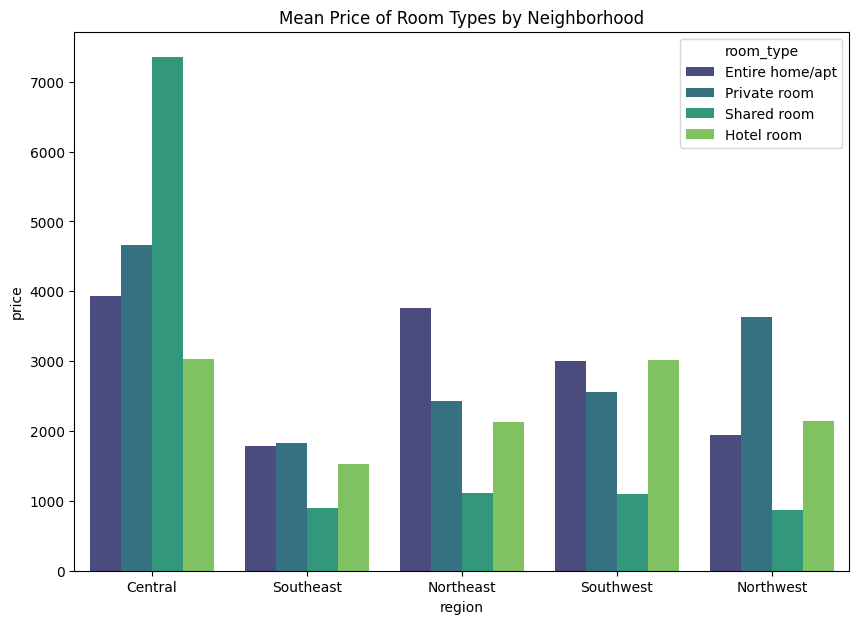

In [2403]:
# create graph to see the mean prices of each room_type in each zonal area - for cleaning purposes
plt.figure(figsize=(10, 7))
sns.barplot(x = "region", y = "price", data = df, hue = "room_type", estimator=np.mean, errorbar= None, palette="viridis")
plt.title("Mean Price of Room Types by Neighborhood")

Text(0.5, 1.0, 'Median Price of Room Types by Neighborhood')

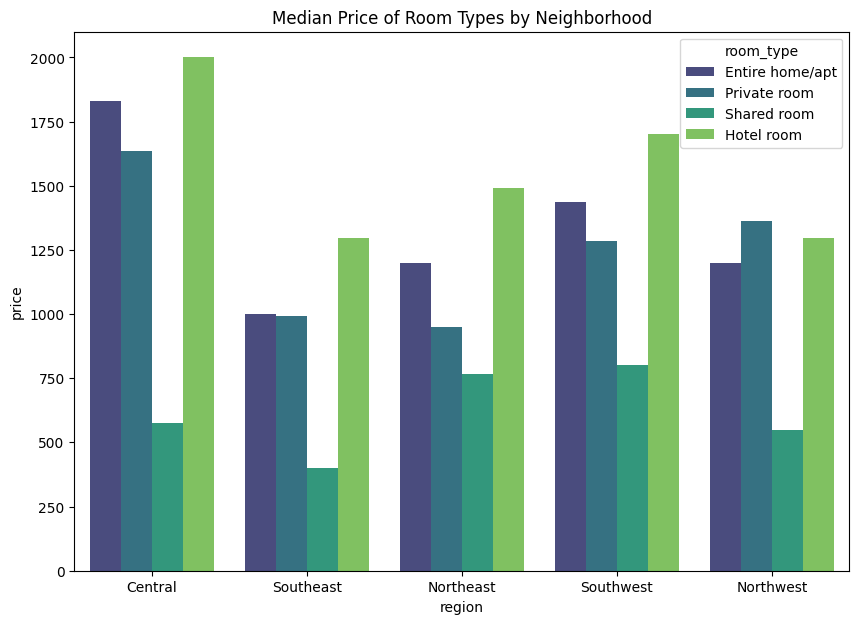

In [2404]:
# create graph to see the median prices of each room_type in each zonal area - for cleaning purposes
plt.figure(figsize=(10, 7))
sns.barplot(x = "region", y = "price", data = df, hue = "room_type", estimator=np.median, errorbar= None, palette="viridis")
plt.title("Median Price of Room Types by Neighborhood")

handle outliers per region per room_type

In [2405]:
# create sub dataframes based on region
central = df[df["region"] == "Central"]
ne = df[df["region"] == "Northeast"]
nw = df[df["region"] == "Northwest"]
se = df[df["region"] == "Southeast"]
sw = df[df["region"] == "Southwest"]

## central

In [2406]:
# central["neighbourhood"].value_counts()

In [2407]:
# central["room_type"].value_counts()

In [2408]:
# # create histplot to see distribution of room_type price side by side in central area
# plt.figure(figsize=(20, 10))
# plt.title("Distribution of Prices by Room Types in Central Area\n")
# plt.box(on= None)
# plt.axis("off")

# plt.subplot(2, 2, 1)
# sns.boxplot(x = "price", data = central[central["room_type"] == "Entire home/apt"])
# plt.title("Entire Home/Apt")

# plt.subplot(2, 2, 2)
# sns.boxplot(x = "price", data = central[central["room_type"] == "Hotel room"])
# plt.title("Hotel Room")

# plt.subplot(2, 2, 3)
# sns.boxplot(x = "price", data = central[central["room_type"] == "Private room"])
# plt.title("Private Room")

# plt.subplot(2, 2, 4)
# sns.boxplot(x = "price", data = central[central["room_type"] == "Shared room"])
# plt.title("Shared Room")

- none are normally distributed
- there are outliers that need to be addressed

remove outliers from entire home/apt

In [2409]:
# central[central["room_type"] == "Entire home/apt"].sort_values(by = "price", ascending=False).head(10)
# extreme outliers start from 1000000 and up

In [2410]:
central = central.loc[~((central["room_type"] == "Entire home/apt") & (central["price"] >= 1000000))]

In [2411]:
# create function to calculate iqr and outliers
def price_outlier(df):
    Q1 = df["price"].quantile(0.25)
    Q3 = df["price"].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    lower_outliers = df[df["price"] < lower_bound]
    upper_outliers = df[df["price"] > upper_bound]

    return lower_outliers, upper_outliers, lower_bound, upper_bound

In [2412]:
len(price_outlier(central[central["room_type"] == "Entire home/apt"])[0])
len(price_outlier(central[central["room_type"] == "Entire home/apt"])[1])
value = price_outlier(central[central["room_type"] == "Entire home/apt"])[-1]

In [2413]:
central = central.loc[~((central["room_type"] == "Entire home/apt") & (central["price"] >= value))]

remove outliers from hotel room

In [2414]:
# central[central["room_type"] == "Hotel room"].sort_values(by = "price", ascending=False).head(10)
# extreme outliers start from 15000 and up

In [2415]:
central = central.loc[~((central["room_type"] == "Hotel room") & (central["price"] >= 15000))]

In [2416]:
len(price_outlier(central[central["room_type"] == "Hotel room"])[0])
len(price_outlier(central[central["room_type"] == "Hotel room"])[1])
value = price_outlier(central[central["room_type"] == "Hotel room"])[-1]

In [2417]:
central = central.loc[~((central["room_type"] == "Hotel room") & (central["price"] >= value))]

remove outliers from private room

In [2418]:
# central[central["room_type"] == "Private room"].sort_values(by = "price", ascending=False).head(10)
# extreme outliers start from 100000 and up

In [2419]:
central = central.loc[~((central["room_type"] == "Private room") & (central["price"] >= 100000))]

In [2420]:
len(price_outlier(central[central["room_type"] == "Private room"])[0])
len(price_outlier(central[central["room_type"] == "Private room"])[1])
value = price_outlier(central[central["room_type"] == "Private room"])[-1]

In [2421]:
central = central.loc[~((central["room_type"] == "Private room") & (central["price"] >= value))]

remove outliers from shared room

In [2422]:
# central[central["room_type"] == "Shared room"].sort_values(by = "price", ascending=False).head(10)
# extreme outliers start from 300000 and up

In [2423]:
central = central.loc[~((central["room_type"] == "Shared room") & (central["price"] >= 300000))]

In [2424]:
len(price_outlier(central[central["room_type"] == "Shared room"])[0])
len(price_outlier(central[central["room_type"] == "Shared room"])[1])
value = price_outlier(central[central["room_type"] == "Shared room"])[-1]

In [2425]:
central = central.loc[~((central["room_type"] == "Shared room") & (central["price"] >= value))]

In [2426]:
# # create histplot to see distribution of room_type price side by side in central area - after removing outliers
# plt.figure(figsize=(20, 10))
# plt.title("Distribution of Prices by Room Types in Central Area\n")
# plt.box(on= None)
# plt.axis("off")

# plt.subplot(2, 2, 1)
# sns.boxplot(x = "price", data = central[central["room_type"] == "Entire home/apt"])
# plt.title("Entire Home/Apt")

# plt.subplot(2, 2, 2)
# sns.boxplot(x = "price", data = central[central["room_type"] == "Hotel room"])
# plt.title("Hotel Room")

# plt.subplot(2, 2, 3)
# sns.boxplot(x = "price", data = central[central["room_type"] == "Private room"])
# plt.title("Private Room")

# plt.subplot(2, 2, 4)
# sns.boxplot(x = "price", data = central[central["room_type"] == "Shared room"])
# plt.title("Shared Room")

## Northeast

In [2427]:
# ne["neighbourhood"].value_counts()

In [2428]:
# ne["room_type"].value_counts()

In [2429]:
# # create histplot to see distribution of room_type price side by side in northeast area
# plt.figure(figsize=(20, 10))
# plt.title("Distribution of Prices by Room Types in Northeast Area\n")
# plt.box(on= None)
# plt.axis("off")

# plt.subplot(2, 2, 1)
# sns.boxplot(x = "price", data = ne[ne["room_type"] == "Entire home/apt"])
# plt.title("Entire Home/Apt")

# plt.subplot(2, 2, 2)
# sns.boxplot(x = "price", data = ne[ne["room_type"] == "Hotel room"])
# plt.title("Hotel Room")

# plt.subplot(2, 2, 3)
# sns.boxplot(x = "price", data = ne[ne["room_type"] == "Private room"])
# plt.title("Private Room")

# plt.subplot(2, 2, 4)
# sns.boxplot(x = "price", data = ne[ne["room_type"] == "Shared room"])
# plt.title("Shared Room")

- none are normally distributed
- need to handle outliers

remove outliers from entire home/apt

In [2430]:
# ne[ne["room_type"] == "Entire home/apt"].sort_values(by = "price", ascending=False).head(20)
# extreme outliers start from 60000 and up

In [2431]:
ne = ne.loc[~((ne["room_type"] == "Entire home/apt") & (ne["price"] >= 60000))]

In [2432]:
len(price_outlier(ne[ne["room_type"] == "Entire home/apt"])[0])
len(price_outlier(ne[ne["room_type"] == "Entire home/apt"])[1])
value = price_outlier(ne[ne["room_type"] == "Entire home/apt"])[-1]

In [2433]:
ne = ne.loc[~((ne["room_type"] == "Entire home/apt") & (ne["price"] >= value))]

remove outliers from hotel room

In [2434]:
# ne[ne["room_type"] == "Hotel room"].sort_values(by = "price", ascending=False).head(10)
# extreme outliers start from 9500 and up

In [2435]:
ne = ne.loc[~((ne["room_type"] == "Hotel room") & (ne["price"] >= 9500))]

In [2436]:
len(price_outlier(ne[ne["room_type"] == "Hotel room"])[0])
len(price_outlier(ne[ne["room_type"] == "Hotel room"])[1])
value = price_outlier(ne[ne["room_type"] == "Hotel room"])[-1]

In [2437]:
ne = ne.loc[~((ne["room_type"] == "Hotel room") & (ne["price"] >= value))]

remove outliers from private room

In [2438]:
# ne[ne["room_type"] == "Private room"].sort_values(by = "price", ascending=False).head(15)
# extreme outliers start from 300000 and up

In [2439]:
ne = ne.loc[~((ne["room_type"] == "Private room") & (ne["price"] >= 300000))]

In [2440]:
len(price_outlier(ne[ne["room_type"] == "Private room"])[0])
len(price_outlier(ne[ne["room_type"] == "Private room"])[1])
value = price_outlier(ne[ne["room_type"] == "Private room"])[-1]

In [2441]:
ne = ne.loc[~((ne["room_type"] == "Private room") & (ne["price"] >= value))]

remove outliers from shared room

In [2442]:
# ne[ne["room_type"] == "Shared room"].sort_values(by = "price", ascending=False).head(10)
# extreme outliers start from 4400 and up

In [2443]:
ne = ne.loc[~((ne["room_type"] == "Shared room") & (ne["price"] >= 4400))]

In [2444]:
len(price_outlier(ne[ne["room_type"] == "Shared room"])[0])
len(price_outlier(ne[ne["room_type"] == "Shared room"])[1])
value = price_outlier(ne[ne["room_type"] == "Shared room"])[-1]

In [2445]:
ne = ne.loc[~((ne["room_type"] == "Shared room") & (ne["price"] >= value))]

In [2446]:
# # create histplot to see distribution of room_type price side by side in northeast area - after removing outliers
# plt.figure(figsize=(20, 10))
# plt.title("Distribution of Prices by Room Types in Northeast Area\n")
# plt.box(on= None)
# plt.axis("off")

# plt.subplot(2, 2, 1)
# sns.boxplot(x = "price", data = ne[ne["room_type"] == "Entire home/apt"])
# plt.title("Entire Home/Apt")

# plt.subplot(2, 2, 2)
# sns.boxplot(x = "price", data = ne[ne["room_type"] == "Hotel room"])
# plt.title("Hotel Room")

# plt.subplot(2, 2, 3)
# sns.boxplot(x = "price", data = ne[ne["room_type"] == "Private room"])
# plt.title("Private Room")

# plt.subplot(2, 2, 4)
# sns.boxplot(x = "price", data = ne[ne["room_type"] == "Shared room"])
# plt.title("Shared Room")

## Southeast

In [2447]:
# se["neighbourhood"].value_counts()

In [2448]:
# se["room_type"].value_counts()

In [2449]:
# # create histplot to see distribution of room_type price side by side in southeast area
# plt.figure(figsize=(20, 10))
# plt.title("Distribution of Prices by Room Types in Southeast Area\n")
# plt.box(on= None)
# plt.axis("off")

# plt.subplot(2, 2, 1)
# sns.boxplot(x = "price", data = se[se["room_type"] == "Entire home/apt"])
# plt.title("Entire Home/Apt")

# plt.subplot(2, 2, 2)
# sns.boxplot(x = "price", data = se[se["room_type"] == "Hotel room"])
# plt.title("Hotel Room")

# plt.subplot(2, 2, 3)
# sns.boxplot(x = "price", data = se[se["room_type"] == "Private room"])
# plt.title("Private Room")

# plt.subplot(2, 2, 4)
# sns.boxplot(x = "price", data = se[se["room_type"] == "Shared room"])
# plt.title("Shared Room")

remove outliers from entire home/apt

In [2450]:
se[se["room_type"] == "Entire home/apt"].sort_values(by = "price", ascending=False).head(10)
# extreme outliers start from 23900 and up

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,region
5061,24882757,Detached House for rent in bangkok \n\n$1200/m...,188113892,Preeyawadee,Pra Wet,13.658080,100.693950,Entire home/apt,41557,1,0,No Review,0.00,1,365,0,Southeast
8812,38003654,[Staycation]Near Rot Fai Train Night Market Condo,263356033,Elements,Pra Wet,13.696550,100.646920,Entire home/apt,36950,1,8,2020-03-02,0.20,6,365,0,Southeast
1200,8801560,"30th floor, 10 min to BTS, Seaview",4517723,Kannicha,Bang Na,13.664170,100.649550,Entire home/apt,35000,998,20,2022-10-30,0.26,7,365,5,Southeast
13878,709796043409681676,"4 Br Villa with Private Plunge Pool, On Nut bts",477497744,Vichak,Suanluang,13.709420,100.611170,Entire home/apt,31910,1,0,No Review,0.00,6,347,0,Southeast
13062,650615715315613350,Pool Villa 107A,351309638,Smirah,Bang Na,13.662210,100.602340,Entire home/apt,23900,1,4,2022-12-18,0.77,5,360,4,Southeast
3963,20792684,ให้เช่า ทาวน์โฮม 4 ชั้น สุขุมวิท 101/1 ใกล้ BTS,147034553,ปฏิคม,Bang Na,13.681760,100.614310,Entire home/apt,19000,1,0,No Review,0.00,1,365,0,Southeast
13063,650615903512188048,Pool Villa 103,351309638,Smirah,Bang Na,13.678675,100.609256,Entire home/apt,18714,1,6,2022-12-07,0.96,5,340,6,Southeast
5171,25548273,"2Houses+10Bed+10Bath, Daily Cleaning, Free Pic...",6906718,Anne Araya,Phra Khanong,13.698800,100.606990,Entire home/apt,18000,1,3,2020-01-28,0.06,25,302,0,Southeast
11805,50802053,Private Plunge Pool Villa 4 BR for Dinner Party!,240603715,Sasikarn,Suanluang,13.712410,100.635390,Entire home/apt,17286,1,1,2022-04-17,0.12,31,159,1,Southeast
12725,608356358644561446,"Shan : Private Plunge Pool Villa 4 BR , Free WIFI",240603715,Sasikarn,Suanluang,13.708510,100.613270,Entire home/apt,17286,1,0,No Review,0.00,31,348,0,Southeast


In [2451]:
se = se.loc[~((se["room_type"] == "Entire home/apt") & (se["price"] >= 23900))]

In [2452]:
len(price_outlier(se[se["room_type"] == "Entire home/apt"])[0])
len(price_outlier(se[se["room_type"] == "Entire home/apt"])[1])
value = price_outlier(se[se["room_type"] == "Entire home/apt"])[-1]

In [2453]:
se = se.loc[~((se["room_type"] == "Entire home/apt") & (se["price"] >= value))]

remove outliers from hotel room

In [2454]:
# se[se["room_type"] == "Hotel room"].sort_values(by = "price", ascending=False).head(10)
# extreme outliers start from 5000 and up

In [2455]:
se = se.loc[~((se["room_type"] == "Hotel room") & (se["price"] >= 5000))]

In [2456]:
len(price_outlier(se[se["room_type"] == "Hotel room"])[0])
len(price_outlier(se[se["room_type"] == "Hotel room"])[1])
value = price_outlier(se[se["room_type"] == "Hotel room"])[-1]

In [2457]:
se = se.loc[~((se["room_type"] == "Hotel room") & (se["price"] >= value))]

remove outliers from private room

In [2458]:
# se[se["room_type"] == "Private room"].sort_values(by = "price", ascending=False).head(10)
# extreme outliers start from 80000 and up

In [2459]:
se = se.loc[~((se["room_type"] == "Private room") & (se["price"] >= 80000))]

In [2460]:
len(price_outlier(se[se["room_type"] == "Private room"])[0])
len(price_outlier(se[se["room_type"] == "Private room"])[1])
value = price_outlier(se[se["room_type"] == "Private room"])[-1]

In [2461]:
se = se.loc[~((se["room_type"] == "Private room") & (se["price"] >= value))]

remove outliers from shared room

In [2462]:
# se[se["room_type"] == "Shared room"].sort_values(by = "price", ascending=False).head(10)
# extreme outliers start from 13000 and up

In [2463]:
se = se.loc[~((se["room_type"] == "Shared room") & (se["price"] >= 13000))]

In [2464]:
len(price_outlier(se[se["room_type"] == "Shared room"])[0])
len(price_outlier(se[se["room_type"] == "Shared room"])[1])
value = price_outlier(se[se["room_type"] == "Shared room"])[-1]

In [2465]:
se = se.loc[~((se["room_type"] == "Shared room") & (se["price"] >= value))]

In [2466]:
# # create histplot to see distribution of room_type price side by side in southeast area - after removing outliers
# plt.figure(figsize=(20, 10))
# plt.title("Distribution of Prices by Room Types in Southeast Area\n")
# plt.box(on= None)
# plt.axis("off")

# plt.subplot(2, 2, 1)
# sns.boxplot(x = "price", data = se[se["room_type"] == "Entire home/apt"])
# plt.title("Entire Home/Apt")

# plt.subplot(2, 2, 2)
# sns.boxplot(x = "price", data = se[se["room_type"] == "Hotel room"])
# plt.title("Hotel Room")

# plt.subplot(2, 2, 3)
# sns.boxplot(x = "price", data = se[se["room_type"] == "Private room"])
# plt.title("Private Room")

# plt.subplot(2, 2, 4)
# sns.boxplot(x = "price", data = se[se["room_type"] == "Shared room"])
# plt.title("Shared Room")

## Northwest

In [2467]:
# nw["neighbourhood"].value_counts()

In [2468]:
# nw["room_type"].value_counts()

In [2469]:
# # create histplot to see distribution of room_type price side by side in northwest area
# plt.figure(figsize=(20, 10))
# plt.title("Distribution of Prices by Room Types in Northwest Area\n")
# plt.box(on= None)
# plt.axis("off")

# plt.subplot(2, 2, 1)
# sns.boxplot(x = "price", data = nw[nw["room_type"] == "Entire home/apt"])
# plt.title("Entire Home/Apt")

# plt.subplot(2, 2, 2)
# sns.boxplot(x = "price", data = nw[nw["room_type"] == "Hotel room"])
# plt.title("Hotel Room")

# plt.subplot(2, 2, 3)
# sns.boxplot(x = "price", data = nw[nw["room_type"] == "Private room"])
# plt.title("Private Room")

# plt.subplot(2, 2, 4)
# sns.boxplot(x = "price", data = nw[nw["room_type"] == "Shared room"])
# plt.title("Shared Room")

- not normally distributed
- need to handle outliers

remove outliers from entire home/apt

In [2470]:
# nw[nw["room_type"] == "Entire home/apt"].sort_values(by = "price", ascending=False).head(10)
# extreme outliers start from 25000 and up

In [2471]:
nw = nw.loc[~((nw["room_type"] == "Entire home/apt") & (nw["price"] >= 25000))]

In [2472]:
len(price_outlier(nw[nw["room_type"] == "Entire home/apt"])[0])
len(price_outlier(nw[nw["room_type"] == "Entire home/apt"])[1])
value = price_outlier(nw[nw["room_type"] == "Entire home/apt"])[-1]

In [2473]:
nw = nw.loc[~((nw["room_type"] == "Entire home/apt") & (nw["price"] >= value))]

remove outlier from hotel room

In [2474]:
# nw[nw["room_type"] == "Hotel room"].sort_values(by = "price", ascending=False).head(10)
# extreme outliers start from 12000 and up

In [2475]:
nw = nw.loc[~((nw["room_type"] == "Hotel room") & (nw["price"] >= 12000))]

In [2476]:
len(price_outlier(nw[nw["room_type"] == "Hotel room"])[0])
len(price_outlier(nw[nw["room_type"] == "Hotel room"])[1])
value = price_outlier(nw[nw["room_type"] == "Hotel room"])[-1]

In [2477]:
nw = nw.loc[~((nw["room_type"] == "Hotel room") & (nw["price"] >= value))]

remove outliers from private room

In [2478]:
# nw[nw["room_type"] == "Private room"].sort_values(by = "price", ascending=False).head(10)
# extreme outliers start from 100000 and up

In [2479]:
nw = nw.loc[~((nw["room_type"] == "Private room") & (nw["price"] >= 100000))]

In [2480]:
len(price_outlier(nw[nw["room_type"] == "Private room"])[0])
len(price_outlier(nw[nw["room_type"] == "Private room"])[1])
value = price_outlier(nw[nw["room_type"] == "Private room"])[-1]

In [2481]:
nw = nw.loc[~((nw["room_type"] == "Private room") & (nw["price"] >= value))]

remove outliers from shared room

In [2482]:
# nw[nw["room_type"] == "Shared room"].sort_values(by = "price", ascending=False).head(10)
# extreme outliers start from 5195 and up

In [2483]:
nw = nw.loc[~((nw["room_type"] == "Shared room") & (nw["price"] >= 5195))]

In [2484]:
len(price_outlier(nw[nw["room_type"] == "Shared room"])[0])
len(price_outlier(nw[nw["room_type"] == "Shared room"])[1])
value = price_outlier(nw[nw["room_type"] == "Shared room"])[-1]

In [2485]:
nw = nw.loc[~((nw["room_type"] == "Shared room") & (nw["price"] >= value))]

In [2486]:
# # create histplot to see distribution of room_type price side by side in northwest area - after removing outliers
# plt.figure(figsize=(20, 10))
# plt.title("Distribution of Prices by Room Types in Northwest Area\n")
# plt.box(on= None)
# plt.axis("off")

# plt.subplot(2, 2, 1)
# sns.boxplot(x = "price", data = nw[nw["room_type"] == "Entire home/apt"])
# plt.title("Entire Home/Apt")

# plt.subplot(2, 2, 2)
# sns.boxplot(x = "price", data = nw[nw["room_type"] == "Hotel room"])
# plt.title("Hotel Room")

# plt.subplot(2, 2, 3)
# sns.boxplot(x = "price", data = nw[nw["room_type"] == "Private room"])
# plt.title("Private Room")

# plt.subplot(2, 2, 4)
# sns.boxplot(x = "price", data = nw[nw["room_type"] == "Shared room"])
# plt.title("Shared Room")

## Southwest

In [2487]:
# sw["neighbourhood"].value_counts()

In [2488]:
# sw["room_type"].value_counts()

In [2489]:
# # create histplot to see distribution of room_type price side by side in northwest area
# plt.figure(figsize=(20, 10))
# plt.title("Distribution of Prices by Room Types in Southwest Area\n")
# plt.box(on= None)
# plt.axis("off")

# plt.subplot(2, 2, 1)
# sns.boxplot(x = "price", data = sw[sw["room_type"] == "Entire home/apt"])
# plt.title("Entire Home/Apt")

# plt.subplot(2, 2, 2)
# sns.boxplot(x = "price", data = sw[sw["room_type"] == "Hotel room"])
# plt.title("Hotel Room")

# plt.subplot(2, 2, 3)
# sns.boxplot(x = "price", data = sw[sw["room_type"] == "Private room"])
# plt.title("Private Room")

# plt.subplot(2, 2, 4)
# sns.boxplot(x = "price", data = sw[sw["room_type"] == "Shared room"])
# plt.title("Shared Room")

remove outliers from entire home/apt

In [2490]:
# sw[sw["room_type"] == "Entire home/apt"].sort_values(by = "price", ascending=False).head(10)
# extreme outliers start from 160000 and up

In [2491]:
sw = sw.loc[~((sw["room_type"] == "Entire home/apt") & (sw["price"] >= 160000))]

In [2492]:
len(price_outlier(sw[sw["room_type"] == "Entire home/apt"])[0])
len(price_outlier(sw[sw["room_type"] == "Entire home/apt"])[1])
value = price_outlier(sw[sw["room_type"] == "Entire home/apt"])[-1]

In [2493]:
sw = sw.loc[~((sw["room_type"] == "Entire home/apt") & (sw["price"] >= value))]

remove outliers from hotel room

In [2494]:
# sw[sw["room_type"] == "Hotel room"].sort_values(by = "price", ascending=False).head(10)
# extreme outliers start from 10313 and up

In [2495]:
sw = sw.loc[~((sw["room_type"] == "Hotel room") & (sw["price"] >= 160000))]

In [2496]:
len(price_outlier(sw[sw["room_type"] == "Hotel room"])[0])
len(price_outlier(sw[sw["room_type"] == "Hotel room"])[1])
value = price_outlier(sw[sw["room_type"] == "Hotel room"])[-1]

In [2497]:
sw = sw.loc[~((sw["room_type"] == "Hotel room") & (sw["price"] >= value))]

remove outliers from private room

In [2498]:
# sw[sw["room_type"] == "Private room"].sort_values(by = "price", ascending=False).head(10)
# extreme outliers start from 50000 and up

In [2499]:
sw = sw.loc[~((sw["room_type"] == "Private room") & (sw["price"] >= 50000))]

In [2500]:
len(price_outlier(sw[sw["room_type"] == "Private room"])[0])
len(price_outlier(sw[sw["room_type"] == "Private room"])[1])
value = price_outlier(sw[sw["room_type"] == "Private room"])[-1]

In [2501]:
sw = sw.loc[~((sw["room_type"] == "Private room") & (sw["price"] >= value))]

remove outliers from shared room

In [2502]:
# sw[sw["room_type"] == "Shared room"].sort_values(by = "price", ascending=False).head(10)
# extreme outliers start from 8000 and up

In [2503]:
sw = sw.loc[~((sw["room_type"] == "Shared room") & (sw["price"] >= 50000))]

In [2504]:
len(price_outlier(sw[sw["room_type"] == "Shared room"])[0])
len(price_outlier(sw[sw["room_type"] == "Shared room"])[1])
value = price_outlier(sw[sw["room_type"] == "Shared room"])[-1]

In [2505]:
sw = sw.loc[~((sw["room_type"] == "Shared room") & (sw["price"] >= value))]

In [2506]:
# # create histplot to see distribution of room_type price side by side in northwest area - after removing outliers
# plt.figure(figsize=(20, 10))
# plt.title("Distribution of Prices by Room Types in Southwest Area\n")
# plt.box(on= None)
# plt.axis("off")

# plt.subplot(2, 2, 1)
# sns.boxplot(x = "price", data = sw[sw["room_type"] == "Entire home/apt"])
# plt.title("Entire Home/Apt")

# plt.subplot(2, 2, 2)
# sns.boxplot(x = "price", data = sw[sw["room_type"] == "Hotel room"])
# plt.title("Hotel Room")

# plt.subplot(2, 2, 3)
# sns.boxplot(x = "price", data = sw[sw["room_type"] == "Private room"])
# plt.title("Private Room")

# plt.subplot(2, 2, 4)
# sns.boxplot(x = "price", data = sw[sw["room_type"] == "Shared room"])
# plt.title("Shared Room")

In [2507]:
df2 = pd.concat([central, nw, sw, ne, se])

In [2508]:
# df2.head()

In [2509]:
df2 = df2[["id", "region", "neighbourhood", "room_type", "price", "number_of_reviews", "availability_365"]]

In [2510]:
df2.head()

,id,region,neighbourhood,room_type,price,number_of_reviews,availability_365
0,27934,Central,Ratchathewi,Entire home/apt,1905,65,353
14,959254,Central,Khlong Toei,Entire home/apt,1400,0,365
16,1791481,Central,Khlong Toei,Entire home/apt,1577,78,330
19,1793000,Central,Vadhana,Entire home/apt,5034,287,349
22,965722,Central,Vadhana,Private room,3775,3,364


Text(0.5, 1.0, 'Median Price of Room Types by Neighborhood')

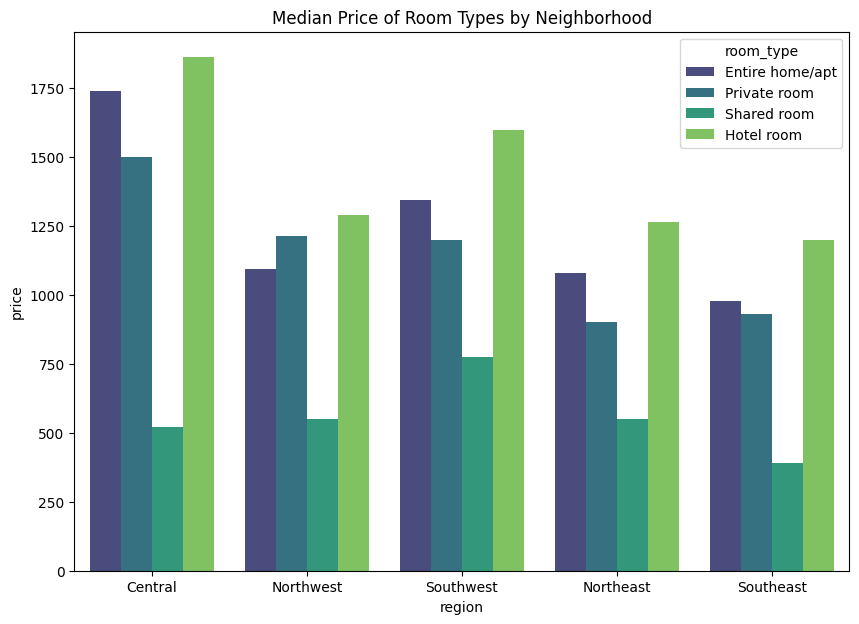

In [2511]:
# create graph to see the median prices of each room_type in each zonal area - after removing outliers
plt.figure(figsize=(10, 7))
sns.barplot(x = "region", y = "price", data = df2, hue = "room_type", estimator=np.median, errorbar= None, palette="viridis")
plt.title("Median Price of Room Types by Neighborhood")

Text(0.5, 1.0, 'Median Numer of Reviews of by Region')

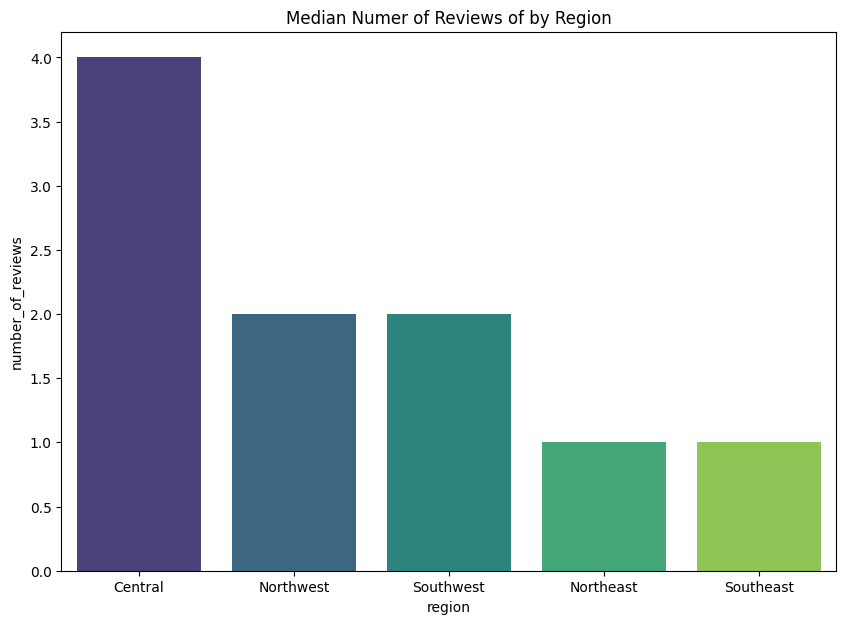

In [2512]:
# create graph to see the median prices of each room_type in each zonal area - after removing outliers
plt.figure(figsize=(10, 7))
sns.barplot(x = "region", y = "number_of_reviews", data = df2, hue = "region", estimator=np.median, errorbar= None, palette="viridis")
plt.title("Median Numer of Reviews of by Region")

Text(0.5, 1.0, 'Median Number of Reviews of by Region')

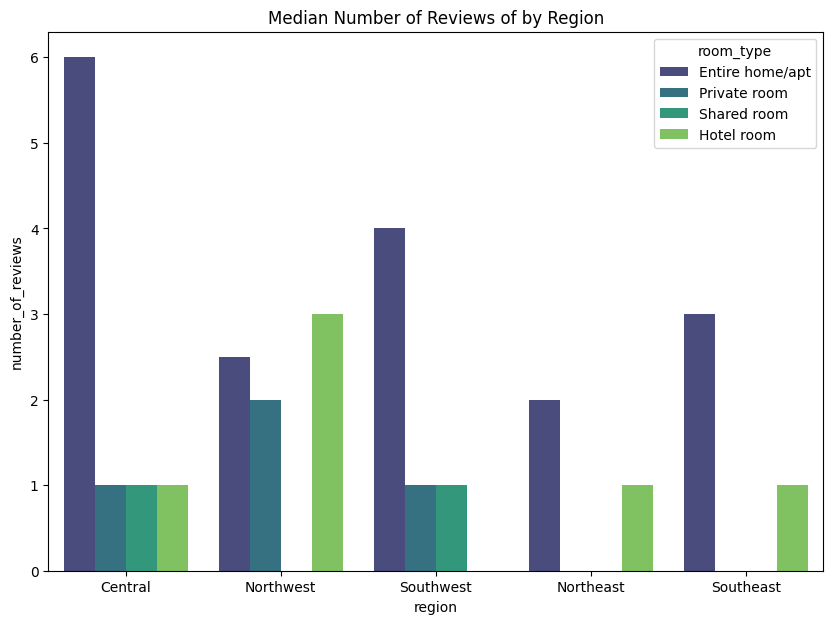

In [2513]:
# create graph to see the median prices of each room_type in each zonal area - after removing outliers
plt.figure(figsize=(10, 7))
sns.barplot(x = "region", y = "number_of_reviews", data = df2, hue = "room_type", estimator=np.median, errorbar= None, palette="viridis")
plt.title("Median Number of Reviews of by Region")

In [2514]:
df2["booking_activity"] = 365 - df2["availability_365"]

Text(0.5, 1.0, 'Median Booking Activity of by Region')

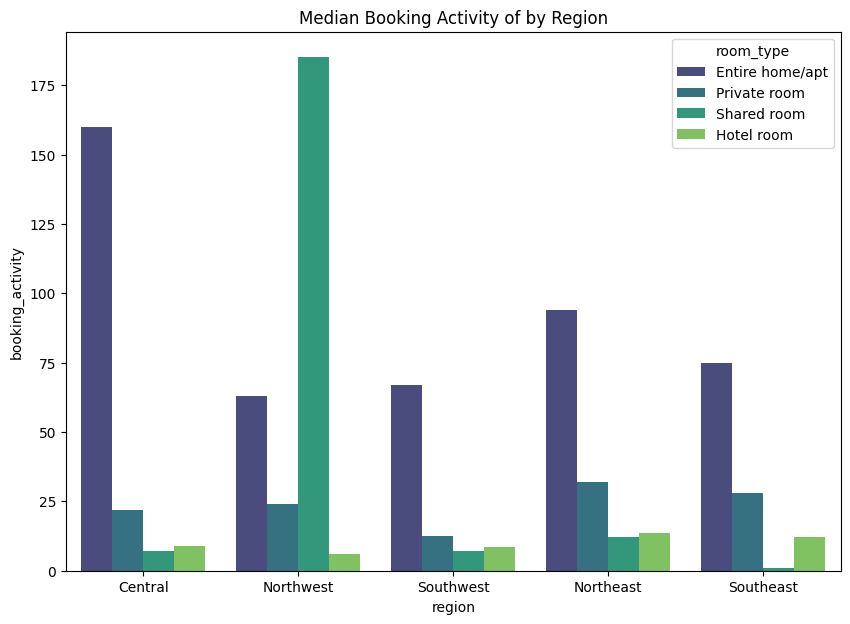

In [2515]:
# create graph to see the median prices of each room_type in each zonal area - after removing outliers
plt.figure(figsize=(10, 7))
sns.barplot(x = "region", y = "booking_activity", data = df2, hue = "room_type", estimator=np.median, errorbar= None, palette="viridis")
plt.title("Median Booking Activity of by Region")

In [2516]:
df2.head()

,id,region,neighbourhood,room_type,price,number_of_reviews,availability_365,booking_activity
0,27934,Central,Ratchathewi,Entire home/apt,1905,65,353,12
14,959254,Central,Khlong Toei,Entire home/apt,1400,0,365,0
16,1791481,Central,Khlong Toei,Entire home/apt,1577,78,330,35
19,1793000,Central,Vadhana,Entire home/apt,5034,287,349,16
22,965722,Central,Vadhana,Private room,3775,3,364,1


Text(0.5, 1.0, 'Distribution of Number of Reviews')

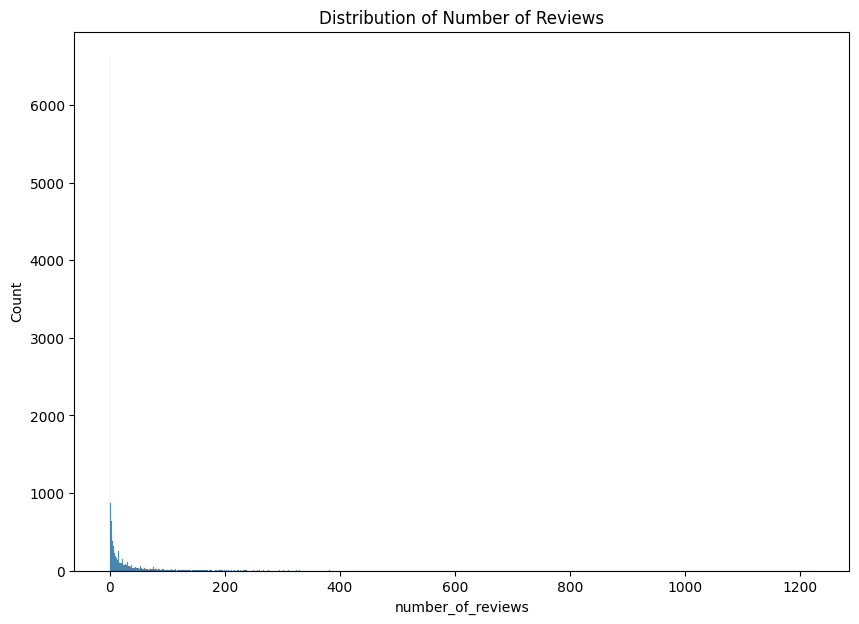

In [2517]:
plt.figure(figsize=(10, 7))
sns.histplot(x = "number_of_reviews",  data = df2)
plt.title("Distribution of Number of Reviews")

In [2518]:
def ordinal_reviews_count(df):
    q1 = df2["number_of_reviews"].quantile(0.33)
    q2 = df2["number_of_reviews"].quantile(0.66)

    bins = [df2["number_of_reviews"].min(), q1 + 0.01, q2, df2["number_of_reviews"].max()]
    labels = [1, 2, 3]

    df = df.copy()  # Ensure we're working with a copy to avoid SettingWithCopyWarning
    df.loc[:, "reviews_activity"] = pd.cut(df2["number_of_reviews"], bins=bins, labels=labels, include_lowest=True)

    return df  # Return the modified DataFrame

In [2519]:
df2 = ordinal_reviews_count(df2)

In [2520]:
df2.head()

,id,region,neighbourhood,room_type,price,number_of_reviews,availability_365,booking_activity,reviews_activity
0,27934,Central,Ratchathewi,Entire home/apt,1905,65,353,12,3
14,959254,Central,Khlong Toei,Entire home/apt,1400,0,365,0,1
16,1791481,Central,Khlong Toei,Entire home/apt,1577,78,330,35,3
19,1793000,Central,Vadhana,Entire home/apt,5034,287,349,16,3
22,965722,Central,Vadhana,Private room,3775,3,364,1,2


In [2521]:
def ordinal_booking_count(df):
    q1 = df2["booking_activity"].quantile(0.33)
    q2 = df2["booking_activity"].quantile(0.66)

    bins = [df2["booking_activity"].min(), q1 + 0.01, q2, df2["booking_activity"].max()]
    labels = [1, 2, 3]

    df = df.copy()  # Ensure we're working with a copy to avoid SettingWithCopyWarning
    df.loc[:, "booking_activity_ord"] = pd.cut(df2["booking_activity"], bins=bins, labels=labels, include_lowest=True)

    return df  # Return the modified DataFrame

In [2522]:
df2 = ordinal_booking_count(df2)

In [2523]:
df2.head()

,id,region,neighbourhood,room_type,price,number_of_reviews,availability_365,booking_activity,reviews_activity,booking_activity_ord
0,27934,Central,Ratchathewi,Entire home/apt,1905,65,353,12,3,1
14,959254,Central,Khlong Toei,Entire home/apt,1400,0,365,0,1,1
16,1791481,Central,Khlong Toei,Entire home/apt,1577,78,330,35,3,2
19,1793000,Central,Vadhana,Entire home/apt,5034,287,349,16,3,2
22,965722,Central,Vadhana,Private room,3775,3,364,1,2,1


In [2524]:
df2["reviews_activity"] = df2["reviews_activity"].astype(int)
df2["booking_activity_ord"] = df2["booking_activity_ord"].astype(int)

In [2525]:
df2["popularity"] = df2["reviews_activity"] + df2["booking_activity_ord"]

In [2526]:
df2.head()

,id,region,neighbourhood,room_type,price,number_of_reviews,availability_365,booking_activity,reviews_activity,booking_activity_ord,popularity
0,27934,Central,Ratchathewi,Entire home/apt,1905,65,353,12,3,1,4
14,959254,Central,Khlong Toei,Entire home/apt,1400,0,365,0,1,1,2
16,1791481,Central,Khlong Toei,Entire home/apt,1577,78,330,35,3,2,5
19,1793000,Central,Vadhana,Entire home/apt,5034,287,349,16,3,2,5
22,965722,Central,Vadhana,Private room,3775,3,364,1,2,1,3


Text(0.5, 1.0, 'Median Popularity of Room Types by Neighborhood')

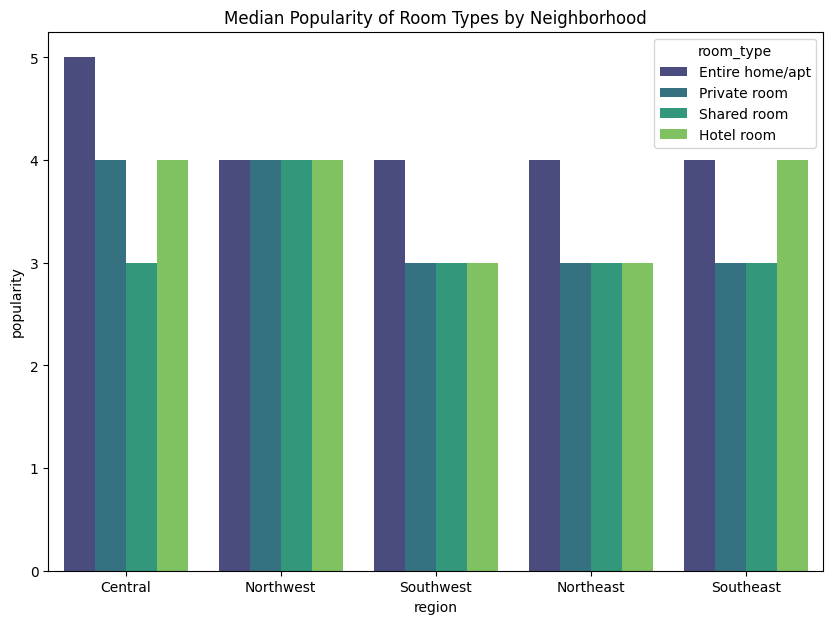

In [2527]:
# create graph to see the median prices of each room_type in each zonal area - after removing outliers
plt.figure(figsize=(10, 7))
sns.barplot(x = "region", y = "popularity", data = df2, hue = "room_type", estimator=np.median, errorbar= None, palette="viridis")
plt.title("Median Popularity of Room Types by Neighborhood")

In [2528]:
df2["revenue_potential"] = df2["price"] * df2["popularity"]

In [2529]:
df2.head()

,id,region,neighbourhood,room_type,price,number_of_reviews,availability_365,booking_activity,reviews_activity,booking_activity_ord,popularity,revenue_potential
0,27934,Central,Ratchathewi,Entire home/apt,1905,65,353,12,3,1,4,7620
14,959254,Central,Khlong Toei,Entire home/apt,1400,0,365,0,1,1,2,2800
16,1791481,Central,Khlong Toei,Entire home/apt,1577,78,330,35,3,2,5,7885
19,1793000,Central,Vadhana,Entire home/apt,5034,287,349,16,3,2,5,25170
22,965722,Central,Vadhana,Private room,3775,3,364,1,2,1,3,11325


Text(0.5, 1.0, 'Median Rev Pot of Room Types by Neighborhood')

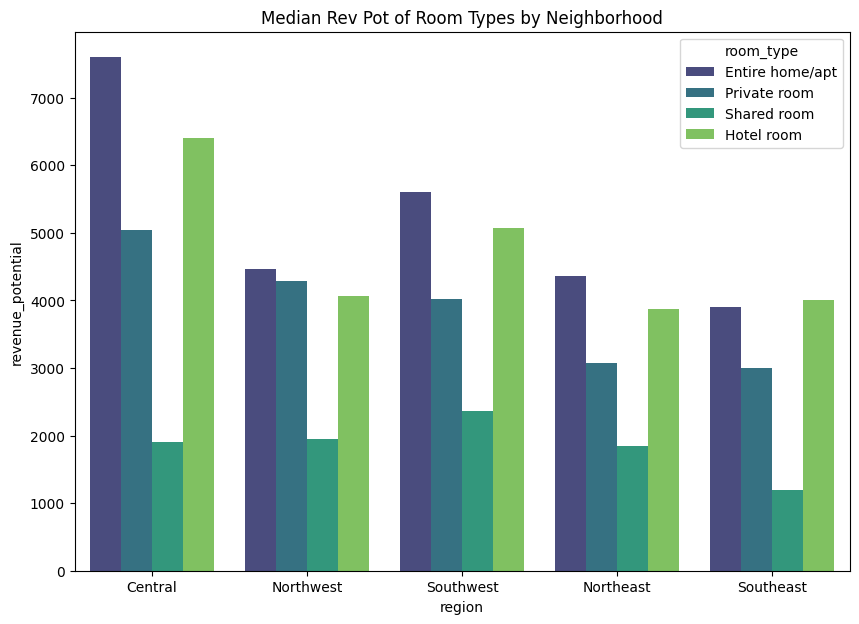

In [2530]:
# create graph to see the median prices of each room_type in each zonal area - after removing outliers
plt.figure(figsize=(10, 7))
sns.barplot(x = "region", y = "revenue_potential", data = df2, hue = "room_type", estimator=np.median, errorbar= None, palette="viridis")
plt.title("Median Rev Pot of Room Types by Neighborhood")

In [2531]:
df3 = pd.concat([central, nw, sw, ne, se])

In [2532]:
df3.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,region
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,Central
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.71516,100.56806,Entire home/apt,1400,30,0,No Review,0.00,1,365,0,Central
16,1791481,Nice and Quiet condo near BTS Onnut,9399478,Piyakorn,Khlong Toei,13.70719,100.59936,Entire home/apt,1577,30,78,2019-05-31,0.78,1,330,0,Central
19,1793000,The Duplex - Asoke- Luxury 92sqm,9407280,Timo,Vadhana,13.74668,100.56137,Entire home/apt,5034,21,287,2022-11-22,2.59,1,349,3,Central
22,965722,Siamese Gioia on Sukhumvit 31,5265861,Chuchart,Vadhana,13.74444,100.57003,Private room,3775,30,3,2018-12-24,0.05,1,364,0,Central


In [2533]:
df3 = df3[["id", "region", "neighbourhood", "room_type", "price", "number_of_reviews", "availability_365"]]

In [2534]:
def ordinal_reviews_count(df):
    q1 = df3["number_of_reviews"].quantile(0.33)
    q2 = df3["number_of_reviews"].quantile(0.66)

    bins = [df3["number_of_reviews"].min(), q1 + 0.01, q2, df3["number_of_reviews"].max()]
    labels = [1, 2, 3]

    df = df.copy()  # Ensure we're working with a copy to avoid SettingWithCopyWarning
    df.loc[:, "popularity"] = pd.cut(df3["number_of_reviews"], bins=bins, labels=labels, include_lowest=True)

    return df  # Return the modified DataFrame

In [2535]:
df3 = ordinal_reviews_count(df3)

In [2536]:
df3["occupancy_rate"] = 1 - (df3["availability_365"] / 365)

In [2537]:
df3.head()

,id,region,neighbourhood,room_type,price,number_of_reviews,availability_365,popularity,occupancy_rate
0,27934,Central,Ratchathewi,Entire home/apt,1905,65,353,3,0.032877
14,959254,Central,Khlong Toei,Entire home/apt,1400,0,365,1,0.000000
16,1791481,Central,Khlong Toei,Entire home/apt,1577,78,330,3,0.095890
19,1793000,Central,Vadhana,Entire home/apt,5034,287,349,3,0.043836
22,965722,Central,Vadhana,Private room,3775,3,364,2,0.002740


In [2538]:
df3.groupby(["region", "room_type"])["price"].median()

region     room_type      
Central    Entire home/apt    1736.5
           Hotel room         1860.0
           Private room       1500.0
           Shared room         519.0
Northeast  Entire home/apt    1080.0
           Hotel room         1264.5
           Private room        900.0
           Shared room         550.0
Northwest  Entire home/apt    1091.5
           Hotel room         1290.0
           Private room       1214.0
           Shared room         550.0
Southeast  Entire home/apt     977.0
           Hotel room         1200.0
           Private room        929.0
           Shared room         390.0
Southwest  Entire home/apt    1344.0
           Hotel room         1596.0
           Private room       1200.0
           Shared room         776.0
Name: price, dtype: float64

In [2539]:
def ordinal_occupancy_rate(df):
    q1 = df3["occupancy_rate"].quantile(0.33)
    q2 = df3["occupancy_rate"].quantile(0.66)

    bins = [df3["occupancy_rate"].min(), q1 + 0.001, q2, df3["occupancy_rate"].max()]
    labels = [1, 2, 3]

    df = df.copy()  # Ensure we're working with a copy to avoid SettingWithCopyWarning
    df.loc[:, "occupancy_proxy"] = pd.cut(df3["occupancy_rate"], bins=bins, labels=labels, include_lowest=True)

    return df  # Return the modified DataFrame

In [2540]:
df3 = ordinal_occupancy_rate(df3)

In [2541]:
df3.head()

,id,region,neighbourhood,room_type,price,number_of_reviews,availability_365,popularity,occupancy_rate,occupancy_proxy
0,27934,Central,Ratchathewi,Entire home/apt,1905,65,353,3,0.032877,1
14,959254,Central,Khlong Toei,Entire home/apt,1400,0,365,1,0.000000,1
16,1791481,Central,Khlong Toei,Entire home/apt,1577,78,330,3,0.095890,2
19,1793000,Central,Vadhana,Entire home/apt,5034,287,349,3,0.043836,2
22,965722,Central,Vadhana,Private room,3775,3,364,2,0.002740,1


In [2545]:
df3["popularity"] = df3["popularity"].astype(int)
df3["occupancy_proxy"] = df3["occupancy_proxy"].astype(int)

<Axes: xlabel='popularity', ylabel='count'>

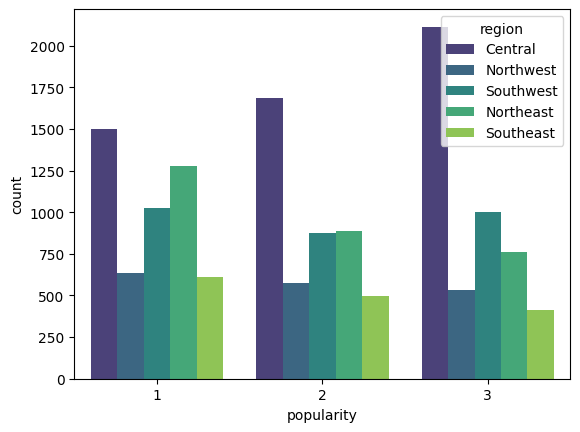

In [2549]:
sns.countplot(data = df3, x = "popularity", hue = "region", palette="viridis")

<Axes: xlabel='occupancy_proxy', ylabel='count'>

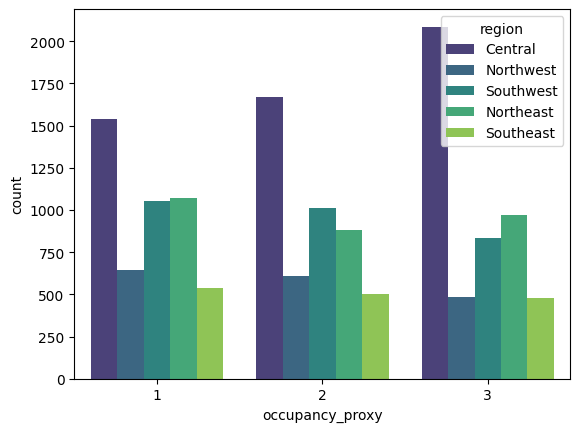

In [2548]:
sns.countplot(data = df3, x = "occupancy_proxy", hue = "region", palette="viridis")

In [2552]:
df3["median_price"] = df3.groupby(["region", "room_type"])["price"].transform("median")

In [2553]:
df3.head()

,id,region,neighbourhood,room_type,price,number_of_reviews,availability_365,popularity,occupancy_rate,occupancy_proxy,median_price
0,27934,Central,Ratchathewi,Entire home/apt,1905,65,353,3,0.032877,1,1736.5
14,959254,Central,Khlong Toei,Entire home/apt,1400,0,365,1,0.000000,1,1736.5
16,1791481,Central,Khlong Toei,Entire home/apt,1577,78,330,3,0.095890,2,1736.5
19,1793000,Central,Vadhana,Entire home/apt,5034,287,349,3,0.043836,2,1736.5
22,965722,Central,Vadhana,Private room,3775,3,364,2,0.002740,1,1500.0


In [2554]:
df3["rev_pot"] = df3["median_price"] * df3["occupancy_proxy"] * df3["popularity"]

In [2555]:
df3.head()

,id,region,neighbourhood,room_type,price,number_of_reviews,availability_365,popularity,occupancy_rate,occupancy_proxy,median_price,rev_pot
0,27934,Central,Ratchathewi,Entire home/apt,1905,65,353,3,0.032877,1,1736.5,5209.5
14,959254,Central,Khlong Toei,Entire home/apt,1400,0,365,1,0.000000,1,1736.5,1736.5
16,1791481,Central,Khlong Toei,Entire home/apt,1577,78,330,3,0.095890,2,1736.5,10419.0
19,1793000,Central,Vadhana,Entire home/apt,5034,287,349,3,0.043836,2,1736.5,10419.0
22,965722,Central,Vadhana,Private room,3775,3,364,2,0.002740,1,1500.0,3000.0


Text(0.5, 1.0, 'Median Rev Pot of Room Types by Region')

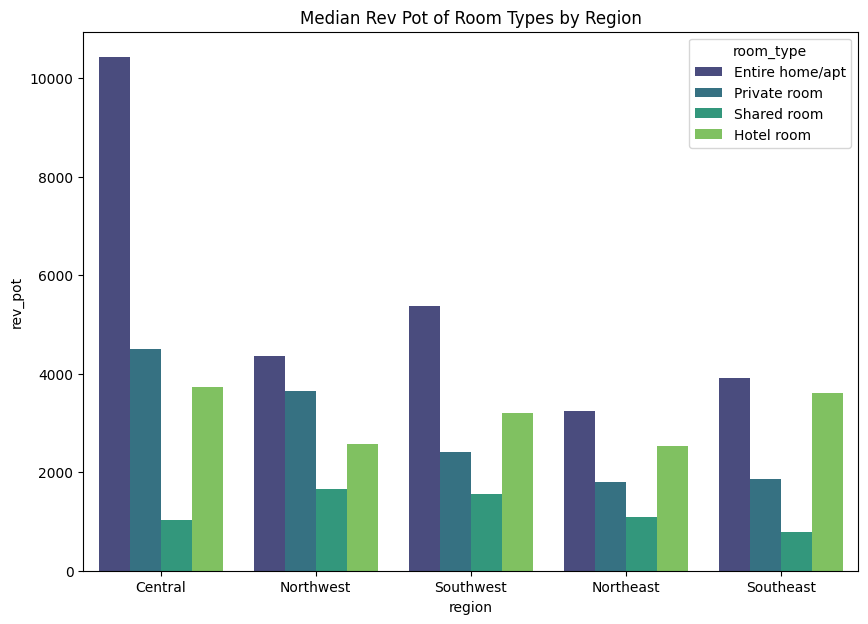

In [2556]:
# create graph to see the median prices of each room_type in each zonal area - after removing outliers
plt.figure(figsize=(10, 7))
sns.barplot(x = "region", y = "rev_pot", data = df3, hue = "room_type", estimator=np.median, errorbar= None, palette="viridis")
plt.title("Median Rev Pot of Room Types by Region")